In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('milse.csv', delimiter=';')

In [5]:
print(df.head())

   Funcio estadocivil    Instrucao  numerodefilhos salario  idade    regiao
0       1    solteiro  fundamental             NaN       4     26  interior
1       2      casado  fundamental             1.0    4,56     32   capital
2       3      casado  fundamental             2.0    5,25     36   capital
3       4    solteiro        medio             NaN    5,73     20     outro
4       5    solteiro  fundamental             NaN    6,26     40     outro


In [7]:
def classificar_variaveis(df):
    qualitativas_nominal = []
    qualitativas_ordinal = []
    quantitativas_discreta = []
    quantitativas_continua = []

    # Lista de palavras-chave para identificar variáveis ordinais
    palavras_chave_ordinais = ['nível', 'classificação', 'grau', 'ordem', 'rank']

    for coluna in df.columns:
        if df[coluna].dtype == 'object':
            if any(palavra in coluna.lower() for palavra in palavras_chave_ordinais):
                qualitativas_ordinal.append(coluna)
            else:
                qualitativas_nominal.append(coluna)
        elif df[coluna].dtype in ['int64', 'int32']:
            quantitativas_discreta.append(coluna)
        elif df[coluna].dtype in ['float64', 'float32']:
            quantitativas_continua.append(coluna)

    return qualitativas_nominal, qualitativas_ordinal, quantitativas_discreta, quantitativas_continua

# Classificando as variáveis
qualitativas_nominal, qualitativas_ordinal, quantitativas_discreta, quantitativas_continua = classificar_variaveis(df)

print("Variáveis Qualitativas Nominal:", qualitativas_nominal)
print("Variáveis Qualitativas Ordinal:", qualitativas_ordinal)
print("Variáveis Quantitativas Discreta:", quantitativas_discreta)
print("Variáveis Quantitativas Contínua:", quantitativas_continua)


Variáveis Qualitativas Nominal: ['estadocivil', 'Instrucao', 'salario', 'regiao']
Variáveis Qualitativas Ordinal: []
Variáveis Quantitativas Discreta: ['Funcio', 'idade']
Variáveis Quantitativas Contínua: ['numerodefilhos']


In [9]:
# Agrupando por estado civil
grupo_estado_civil = df.groupby('estadocivil').size().reset_index(name='count')
print("Agrupamento por Estado Civil:")
print(grupo_estado_civil)

# Agrupando por grau de instrução
grupo_grau_instrucao = df.groupby('Instrucao').size().reset_index(name='count')
print("\nAgrupamento por Grau de Instrução:")
print(grupo_grau_instrucao)

# Agrupando por região
grupo_regiao = df.groupby('regiao').size().reset_index(name='count')
print("\nAgrupamento por Região:")
print(grupo_regiao)


Agrupamento por Estado Civil:
  estadocivil  count
0      casado     20
1    solteiro     16

Agrupamento por Grau de Instrução:
     Instrucao  count
0  fundamental     12
1        medio     18
2     superior      6

Agrupamento por Região:
     regiao  count
0   capital     11
1  interior     12
2     outro     13


In [11]:
# Agrupando por estado civil e grau de instrução
grupo_estado_civil_instrucao = df.groupby(['estadocivil', 'Instrucao']).size().reset_index(name='count')
print("Agrupamento por Estado Civil e Grau de Instrução:")
print(grupo_estado_civil_instrucao)

Agrupamento por Estado Civil e Grau de Instrução:
  estadocivil    Instrucao  count
0      casado  fundamental      5
1      casado        medio     12
2      casado     superior      3
3    solteiro  fundamental      7
4    solteiro        medio      6
5    solteiro     superior      3


In [13]:
# Agrupando por estado civil e região
grupo_estado_civil_regiao = df.groupby(['estadocivil', 'regiao']).size().reset_index(name='count')
print("\nAgrupamento por Estado Civil e Região:")
print(grupo_estado_civil_regiao)


Agrupamento por Estado Civil e Região:
  estadocivil    regiao  count
0      casado   capital      7
1      casado  interior      8
2      casado     outro      5
3    solteiro   capital      4
4    solteiro  interior      4
5    solteiro     outro      8


In [15]:
# convertendo virgulas em pontos 
df['salario'] = df['salario'].str.replace(',', '.').astype(float)

In [17]:
# Média
media_salario = round(df['salario'].mean(), 2)
media_idade = round(df['idade'].mean(), 2)

# Mediana
mediana_salario = round(df['salario'].median(), 2)
mediana_idade = round(df['idade'].median(), 2)

# Moda
moda_salario = round(df['salario'].mode()[0], 2)
moda_idade = round(df['idade'].mode()[0], 2)

print(f"Média Salário: {media_salario}, Média Idade: {media_idade}")
print(f"Mediana Salário: {mediana_salario}, Mediana Idade: {mediana_idade}")
print(f"Moda Salário: {moda_salario}, Moda Idade: {moda_idade}")

# Quartis
quartis_salario = df['salario'].quantile([0.25, 0.5, 0.75]).round(2)
quartis_idade = df['idade'].quantile([0.25, 0.5, 0.75]).round(2)

print(f"Quartis Salário: {quartis_salario}")
print(f"Quartis Idade: {quartis_idade}")

# Variância
variancia_salario = round(df['salario'].var(), 2)
variancia_idade = round(df['idade'].var(), 2)

# Desvio Padrão
desvio_padrao_salario = round(df['salario'].std(), 2)
desvio_padrao_idade = round(df['idade'].std(), 2)

# Amplitude
amplitude_salario = round(df['salario'].max() - df['salario'].min(), 2)
amplitude_idade = round(df['idade'].max() - df['idade'].min(), 2)

print(f"Variância Salário: {variancia_salario}, Variância Idade: {variancia_idade}")
print(f"Desvio Padrão Salário: {desvio_padrao_salario}, Desvio Padrão Idade: {desvio_padrao_idade}")
print(f"Amplitude Salário: {amplitude_salario}, Amplitude Idade: {amplitude_idade}")

# Assimetria
assimetria_salario = round(df['salario'].skew(), 2)
assimetria_idade = round(df['idade'].skew(), 2)

# Curtose
curtose_salario = round(df['salario'].kurt(), 2)
curtose_idade = round(df['idade'].kurt(), 2)

print(f"Assimetria Salário: {assimetria_salario}, Assimetria Idade: {assimetria_idade}")
print(f"Curtose Salário: {curtose_salario}, Curtose Idade: {curtose_idade}")



Média Salário: 11.12, Média Idade: 34.58
Mediana Salário: 10.16, Mediana Idade: 34.5
Moda Salário: 4.0, Moda Idade: 26
Quartis Salário: 0.25     7.55
0.50    10.16
0.75    14.06
Name: salario, dtype: float64
Quartis Idade: 0.25    30.0
0.50    34.5
0.75    40.0
Name: idade, dtype: float64
Variância Salário: 21.04, Variância Idade: 45.39
Desvio Padrão Salário: 4.59, Desvio Padrão Idade: 6.74
Amplitude Salário: 19.3, Amplitude Idade: 28
Assimetria Salário: 0.65, Assimetria Idade: -0.07
Curtose Salário: -0.01, Curtose Idade: -0.54


In [19]:
# Estado Civil
freq_estado_civil = df['estadocivil'].value_counts().reset_index()
freq_estado_civil.columns = ['Estado Civil', 'Frequência']
print("\nFrequência - Estado Civil:")
print(freq_estado_civil)

# Grau de Instrução
freq_grau_instrucao = df['Instrucao'].value_counts().reset_index()
freq_grau_instrucao.columns = ['Grau de Instrução', 'Frequência']
print("\nFrequência - Grau de Instrução:")
print(freq_grau_instrucao)

# Região
freq_regiao = df['regiao'].value_counts().reset_index()
freq_regiao.columns = ['Região', 'Frequência']
print("\nFrequência - Região:")
print(freq_regiao)

# Salário
bins_salario = [0, 1000, 2000, 3000]
labels_salario = ['0-1000', '1001-2000', '2001-3000']
df['salario_binned'] = pd.cut(df['salario'], bins=bins_salario, labels=labels_salario)
freq_salario = df['salario_binned'].value_counts().reset_index()
freq_salario.columns = ['Faixa Salarial', 'Frequência']
print("\nFrequência - Salário:")
print(freq_salario)

# Idade
bins_idade = [20, 30, 40, 50, 60]
labels_idade = ['20-30', '31-40', '41-50', '51-60']
df['idade_binned'] = pd.cut(df['idade'], bins=bins_idade, labels=labels_idade)
freq_idade = df['idade_binned'].value_counts().reset_index()
freq_idade.columns = ['Faixa Etária', 'Frequência']
print("\nFrequência - Idade:")
print(freq_idade)




Frequência - Estado Civil:
  Estado Civil  Frequência
0       casado          20
1     solteiro          16

Frequência - Grau de Instrução:
  Grau de Instrução  Frequência
0             medio          18
1       fundamental          12
2          superior           6

Frequência - Região:
     Região  Frequência
0     outro          13
1  interior          12
2   capital          11

Frequência - Salário:
  Faixa Salarial  Frequência
0         0-1000          36
1      1001-2000           0
2      2001-3000           0

Frequência - Idade:
  Faixa Etária  Frequência
0        31-40          18
1        20-30           9
2        41-50           8
3        51-60           0


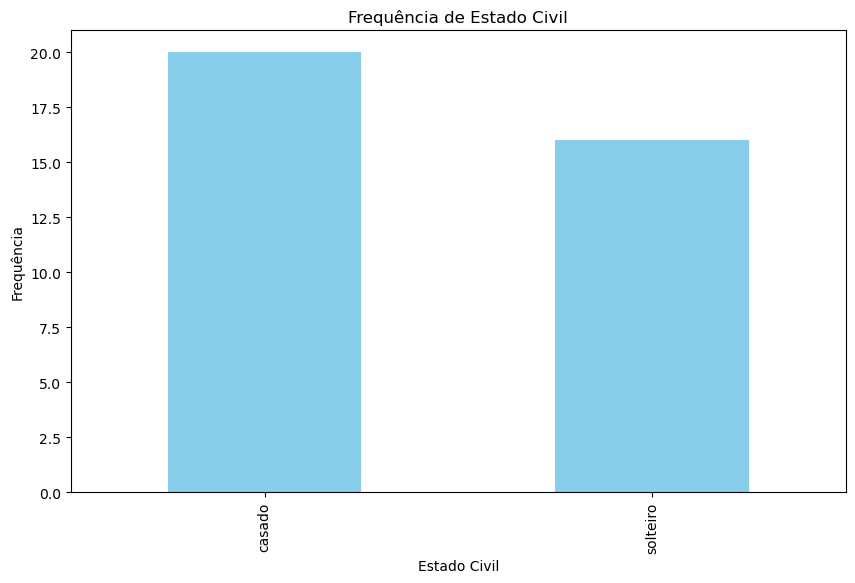

In [21]:
# Gráfico de Barras para Estado Civil
plt.figure(figsize=(10, 6))
df['estadocivil'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequência de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')
plt.show()

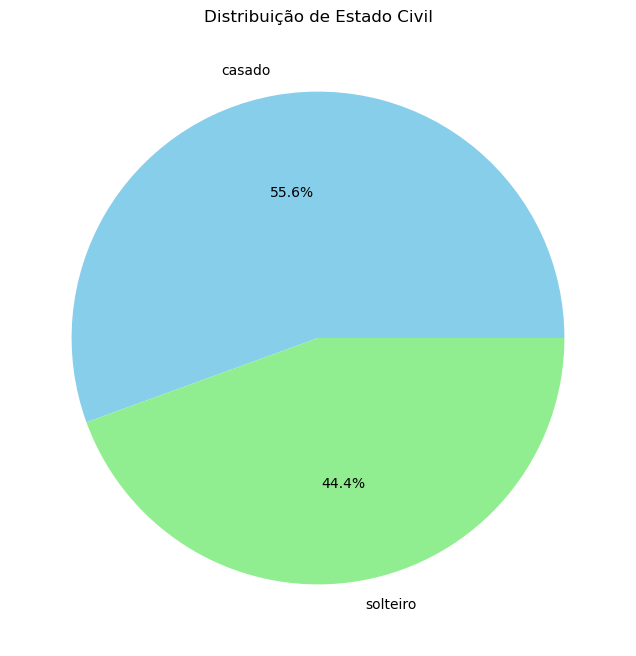

In [23]:
# Gráfico de Setores para Estado Civil
plt.figure(figsize=(8, 8))
df['estadocivil'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Distribuição de Estado Civil')
plt.ylabel('')
plt.show()

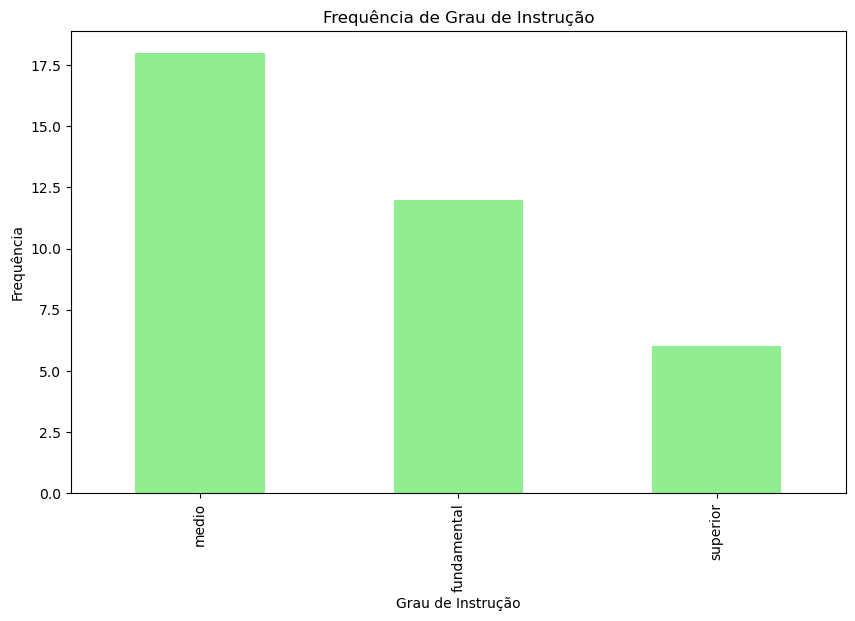

In [25]:
# Gráfico de Barras para Grau de Instrução
plt.figure(figsize=(10, 6))
df['Instrucao'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequência de Grau de Instrução')
plt.xlabel('Grau de Instrução')
plt.ylabel('Frequência')
plt.show()


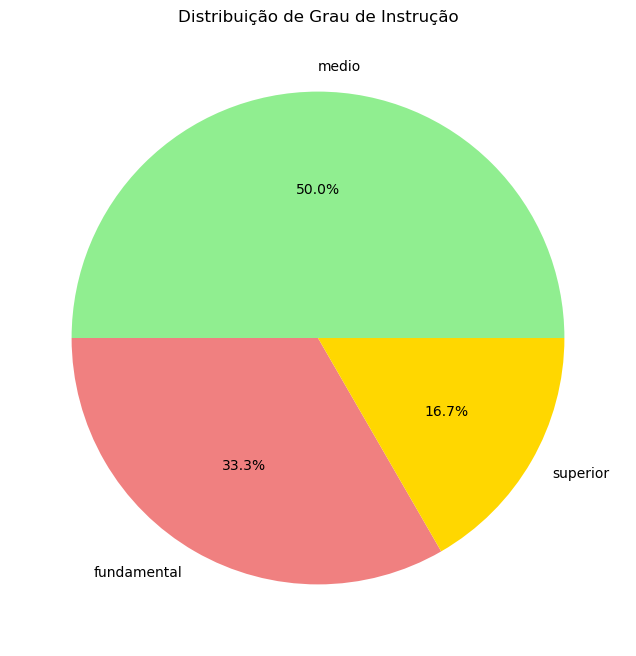

In [27]:
# Gráfico de Setores para Grau de Instrução
plt.figure(figsize=(8, 8))
df['Instrucao'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'gold', 'skyblue'])
plt.title('Distribuição de Grau de Instrução')
plt.ylabel('')
plt.show()


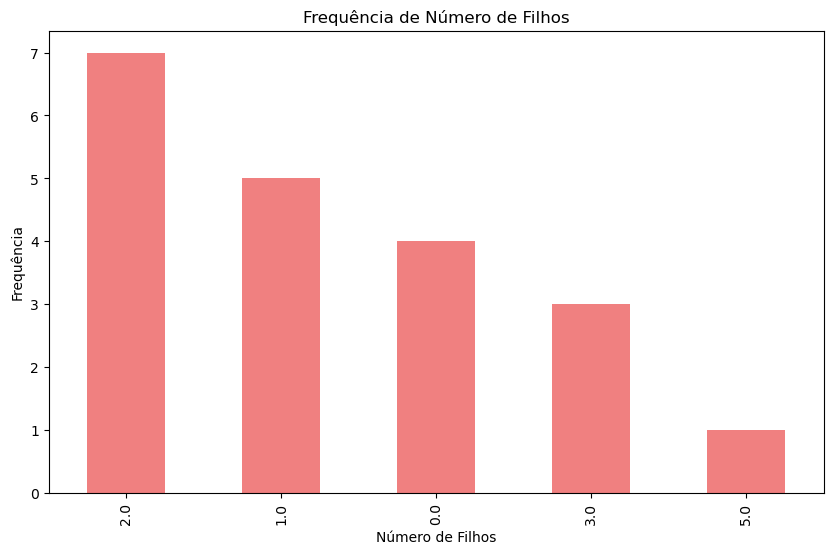

In [29]:
# Gráfico de Barras para Número de Filhos
plt.figure(figsize=(10, 6))
df['numerodefilhos'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequência de Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Frequência')
plt.show()

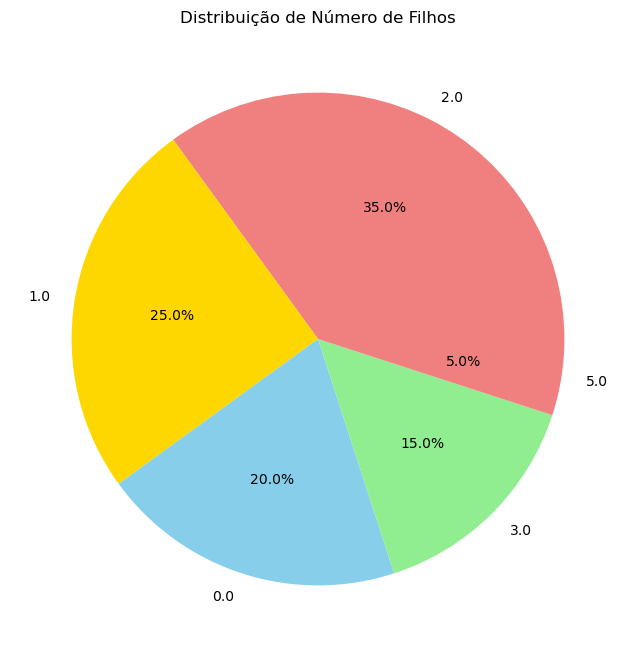

In [31]:
# Gráfico de Setores para Número de Filhos
plt.figure(figsize=(8, 8))
df['numerodefilhos'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'gold', 'skyblue', 'lightgreen'])
plt.title('Distribuição de Número de Filhos')
plt.ylabel('')
plt.show()